# Optical Character Recognition  PaddleOCR

In [1]:
!pip install paddlepaddle-gpu
!pip install paddleocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Nous avons initialisé PP-OCRv3 et les poids requis seront téléchargés automatiquement. Ce package fournit par défaut tous les modèles du système que sont la détection, la classification des angles et la reconnaissance. Il fournit plusieurs arguments pour accéder uniquement aux fonctionnalités requises.
* lang : La langue que nous voulons reconnaître est transmise ici. Par exemple, en pour l'anglais, ch pour le chinois, french pour le français, etc. L'OCR peut reconnaître l'anglais et le chinois par défaut.
* rec_algorithm : prend l'algorithme de reconnaissance à utiliser comme arguments. L'OCR utilise CRNN comme algorithme de reconnaissance par défaut.
* det_algorithm : prend l'algorithme de détection de texte à utiliser comme arguments. L'OCR utilise un détecteur de texte DB comme détecteur par défaut.
* use_angle_cls : Spécifie si le classificateur d'angle doit être utilisé ou non et prend bool comme argument.

In [2]:
from paddleocr import PaddleOCR,draw_ocr
import os
import cv2

import matplotlib.pyplot as plt

%matplotlib inline

ocr = PaddleOCR(use_angle_cls=True)


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_det_infer.tar to /root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer/ch_PP-OCRv4_det_infer.tar


100%|██████████| 4.89M/4.89M [00:14<00:00, 331kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/chinese/ch_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer/ch_PP-OCRv4_rec_infer.tar


100%|██████████| 11.0M/11.0M [00:10<00:00, 1.03MiB/s]


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:12<00:00, 172kiB/s]

[2024/04/05 13:14:45] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv4_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/


Cette fonction prend également quelques arguments.

* img : Il s'agit du premier paramètre de la fonction ocr. En cela, le tableau d'images ou le chemin de l'image est transmis pour effectuer l'OCR.
* det : prend bool comme argument et précise s'il faut utiliser un détecteur ou non.
* rec : prend bool comme argument et spécifie s'il faut utiliser ou non un module de reconnaissance.
* cls : prend bool comme argument et spécifie s'il faut utiliser ou non un classificateur d'angle.

In [ ]:
result = ocr.ocr('./receipt.jpg')

[2022/08/06 05:47:24] ppocr DEBUG: dt_boxes num : 26, elapse : 3.347461223602295
[2022/08/06 05:47:26] ppocr DEBUG: cls num  : 26, elapse : 2.00207257270813
[2022/08/06 05:47:26] ppocr DEBUG: rec_res num  : 26, elapse : 0.12541413307189941


In [ ]:
def save_ocr(img_path, out_path, result, font):

  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output')
  image = cv2.imread(img_path)
  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]
  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)
  cv2.imwrite('save_path.jpg', im_show)
  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img)


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
# Specifying output path and font path.
out_path = './output_images'
font = './simfang.ttf'

*texte en italique*# Reçus

In [ ]:
img_path = './receipt1.jpg'
result = ocr.ocr(img_path)


[2022/08/06 06:45:55] ppocr DEBUG: dt_boxes num : 20, elapse : 0.05149555206298828
[2022/08/06 06:45:55] ppocr DEBUG: cls num  : 20, elapse : 0.01630878448486328
[2022/08/06 06:45:55] ppocr DEBUG: rec_res num  : 20, elapse : 0.07944154739379883


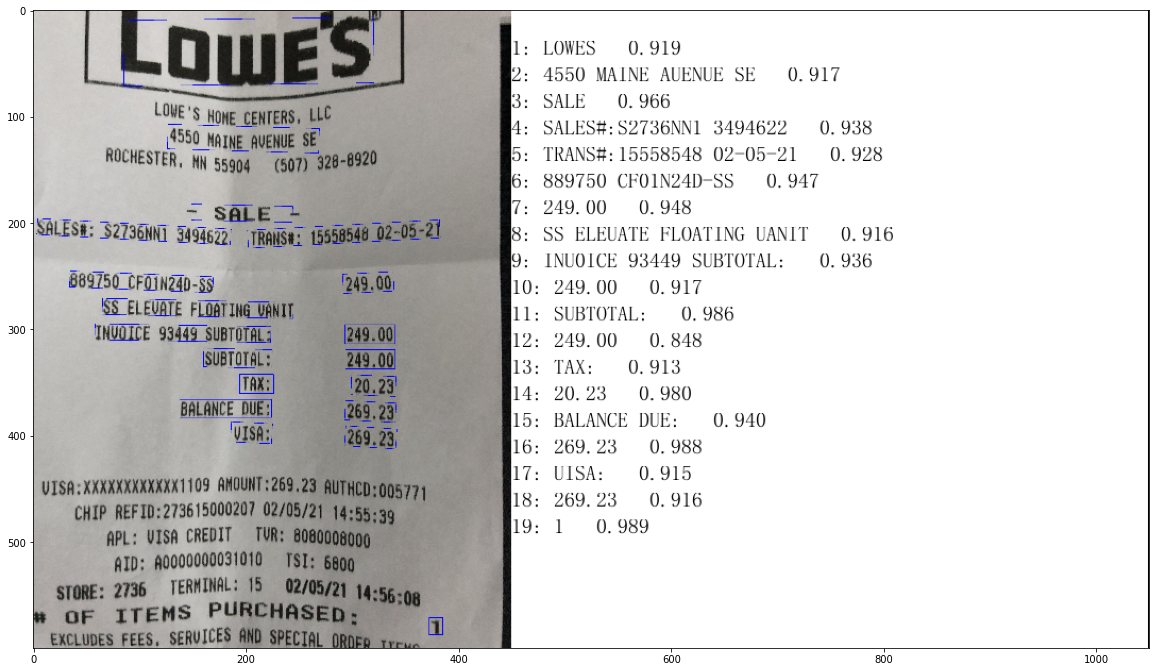

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)


In [ ]:
img_path = './07-receipt2.png'
result = ocr.ocr(img_path)


[2022/08/06 05:49:26] ppocr DEBUG: dt_boxes num : 34, elapse : 0.03280305862426758
[2022/08/06 05:49:26] ppocr DEBUG: cls num  : 34, elapse : 0.023787260055541992
[2022/08/06 05:49:26] ppocr DEBUG: rec_res num  : 34, elapse : 0.11210370063781738


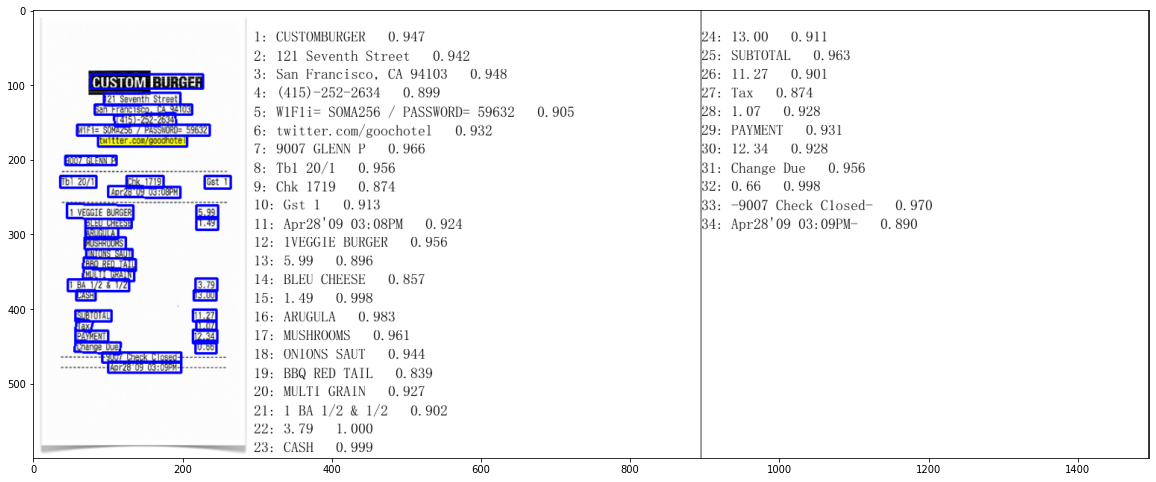

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

# Documents

In [ ]:
img_path = './11-document-1.jpg'
result = ocr.ocr(img_path)


[2022/08/05 18:24:29] ppocr DEBUG: dt_boxes num : 35, elapse : 0.05528736114501953
[2022/08/05 18:24:29] ppocr DEBUG: cls num  : 35, elapse : 0.02937602996826172
[2022/08/05 18:24:30] ppocr DEBUG: rec_res num  : 35, elapse : 0.22655940055847168


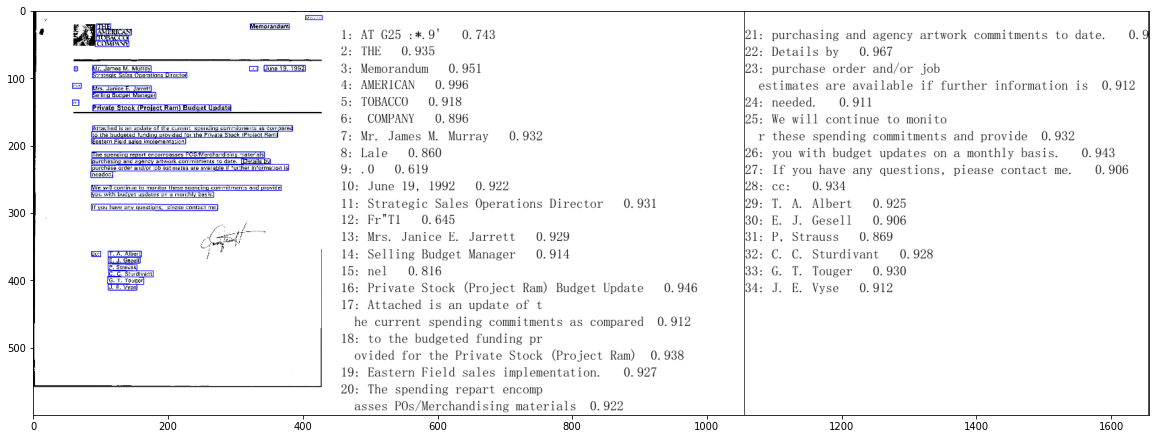

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

In [ ]:
img_path = './13-document-2.png'
result = ocr.ocr(img_path)


[2022/08/05 18:26:11] ppocr DEBUG: dt_boxes num : 51, elapse : 0.08710670471191406
[2022/08/05 18:26:12] ppocr DEBUG: cls num  : 51, elapse : 0.04065251350402832
[2022/08/05 18:26:12] ppocr DEBUG: rec_res num  : 51, elapse : 0.2540602684020996


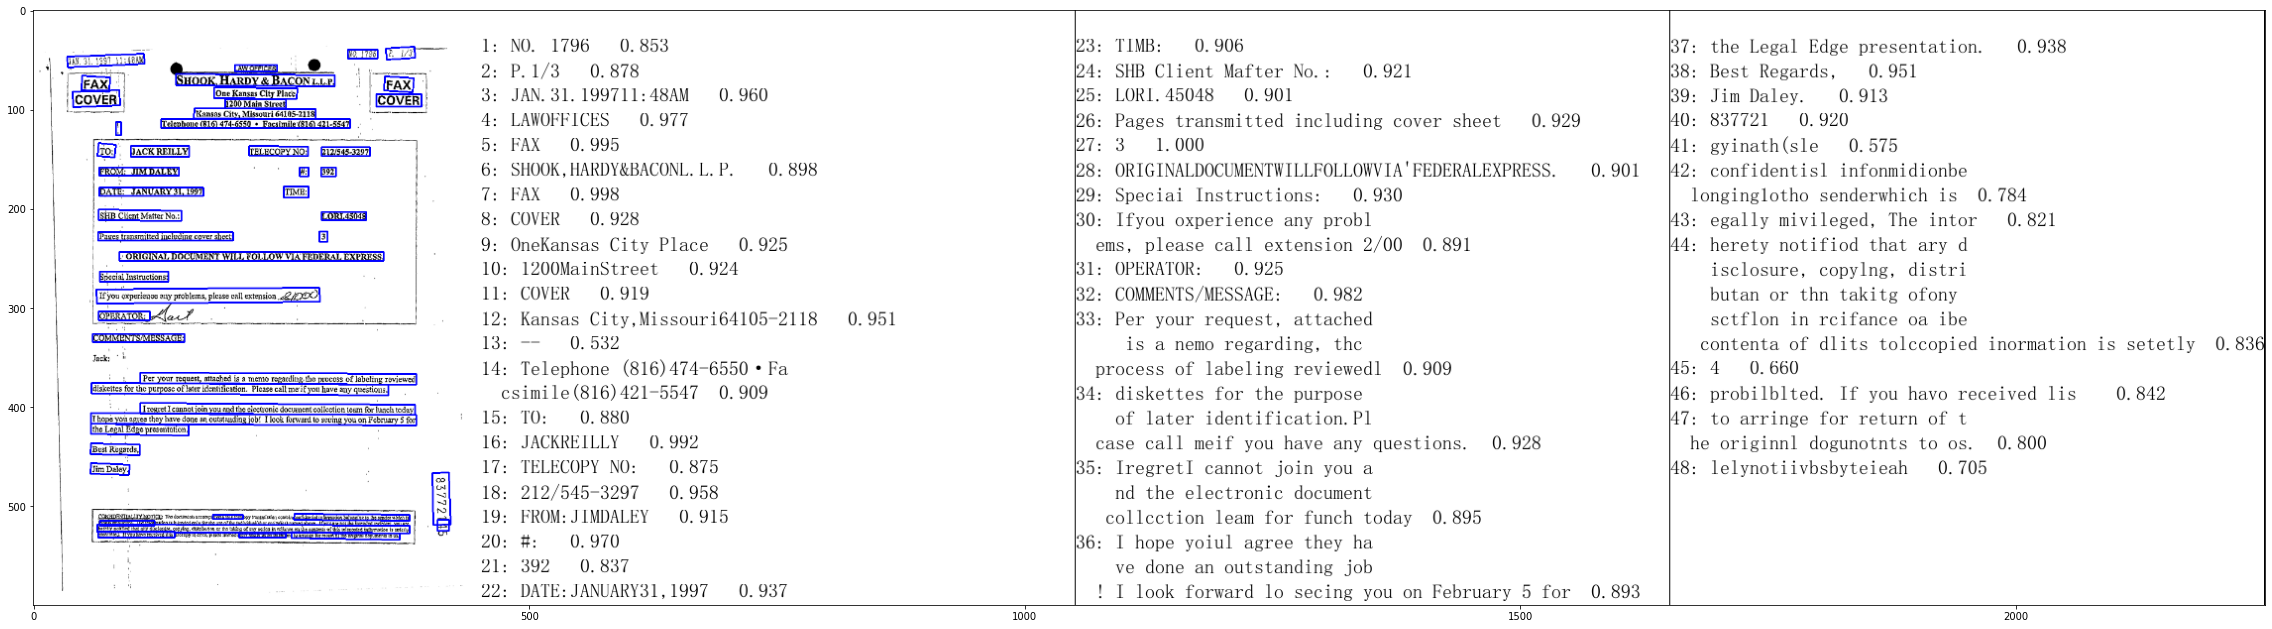

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

Le détecteur sur cette image a manqué certains textes de cette image de document. Mais quel que soit le texte détecté par le détecteur, il est correctement prédit par l'OCR. En regardant les images du document, nous pouvons dire que le détecteur et le module de reconnaissance ne sont pas doués pour gérer les petits textes. Lorsqu'un petit texte est rencontré, il manque ou prédit incorrectement la sortie.

# License Plate

In [ ]:
img_path = './license_plate.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:14:02] ppocr DEBUG: dt_boxes num : 8, elapse : 0.0578005313873291
[2022/08/06 06:14:03] ppocr DEBUG: cls num  : 8, elapse : 0.02799701690673828
[2022/08/06 06:14:03] ppocr DEBUG: rec_res num  : 8, elapse : 0.032570600509643555


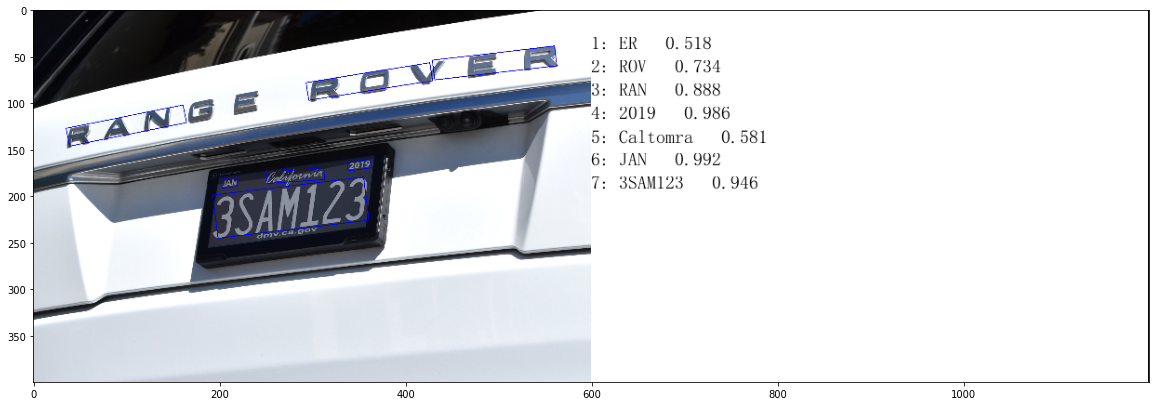

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

# Handwritten Text

In [ ]:
img_path = './handwritten_text.jfif'
result = ocr.ocr(img_path)

[2022/08/06 06:01:27] ppocr DEBUG: dt_boxes num : 3, elapse : 0.00988006591796875
[2022/08/06 06:01:27] ppocr DEBUG: cls num  : 3, elapse : 0.005354642868041992
[2022/08/06 06:01:27] ppocr DEBUG: rec_res num  : 3, elapse : 0.015944480895996094


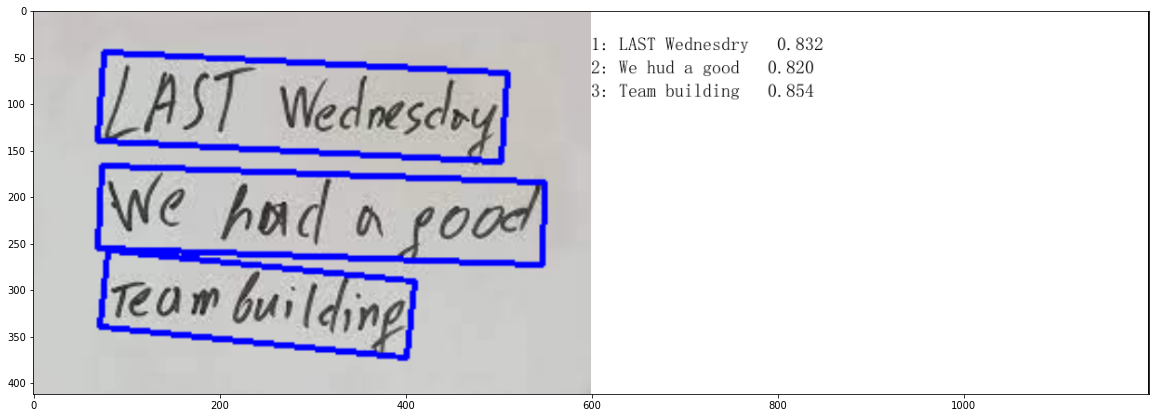

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

In [ ]:
img_path = './curved_text_1.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:24:28] ppocr DEBUG: dt_boxes num : 1, elapse : 0.034102439880371094
[2022/08/06 06:24:28] ppocr DEBUG: cls num  : 1, elapse : 0.005565643310546875
[2022/08/06 06:24:28] ppocr DEBUG: rec_res num  : 1, elapse : 0.007861852645874023


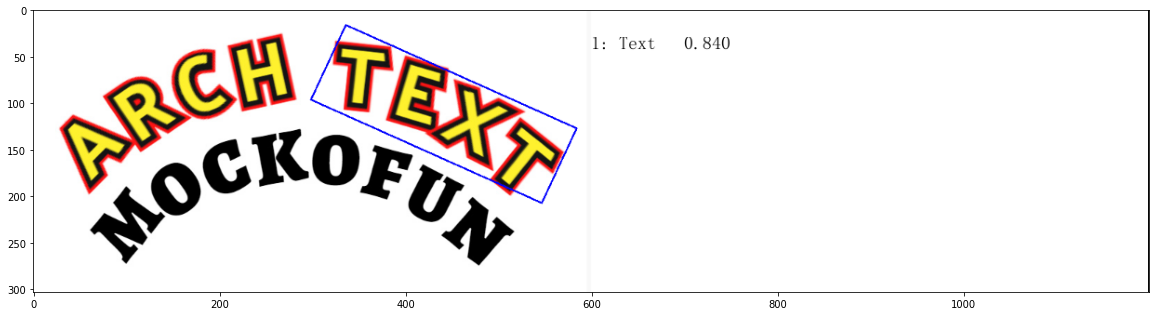

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

In [ ]:
img_path = './curved_text.jpg'
result = ocr.ocr(img_path)

[2022/08/06 06:25:39] ppocr DEBUG: dt_boxes num : 2, elapse : 0.008704185485839844
[2022/08/06 06:25:39] ppocr DEBUG: cls num  : 2, elapse : 0.003996133804321289
[2022/08/06 06:25:39] ppocr DEBUG: rec_res num  : 2, elapse : 0.010673999786376953


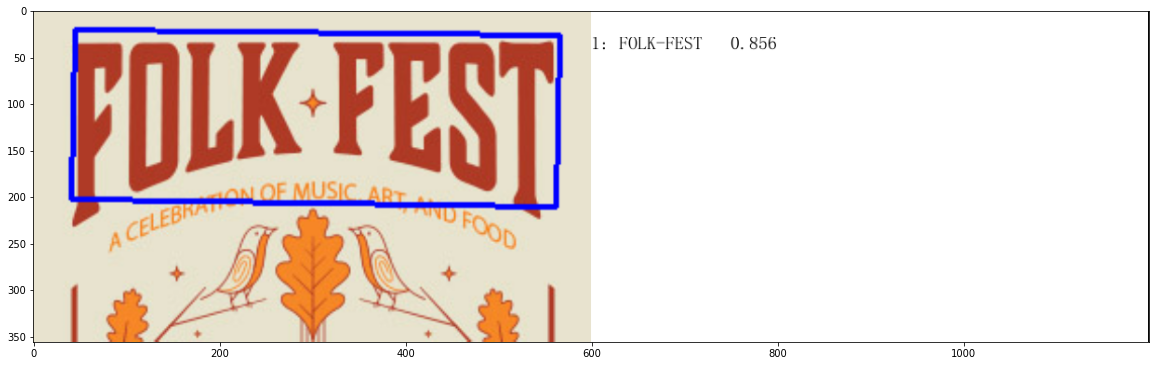

In [ ]:
plt.figure(figsize=(20,20))
save_ocr(img_path, out_path, result, font)

# Conclusion

D'après les expériences ci-dessus, nous pouvons conclure que PP-OCR est un OCR très rapide et très précis avec un détecteur de texte. Mais cela échoue dans certains cas, comme dans le cas des textes manuscrits, des textes courbes et des petits textes qui laissent le texte partiellement détecté ou reconnu de manière inexacte. Pour résoudre ces problèmes, l'OCR et le détecteur peuvent être ajustés sur davantage d'ensembles de données, ce qui peut contribuer à accroître la précision et à obtenir de meilleures performances dans divers scénarios différents.